In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_B(Ld, tau0, beta, L, dh):
    # calculate prediction of B (equation (5) in the main text) from PV homogenization theory

    # set up grid
    N = 100 
    delta = L/(N-1);
    x = np.linspace(delta/2, L - delta/2,N)
    y = np.linspace(delta/2,L - delta/2,N)

    # equations B4/B5 of main text
    psi_bar = (1 - x[:,None]/L)*2*np.pi*tau0/beta*np.sin(2*np.pi*y[None,:]/L)
    q_bar = beta*y[None,:] + 1/Ld**2*psi_bar/np.sum(dh)

    psi = np.zeros((2,N,N))
    
    # upper layer flow
    psi_up = np.zeros([int(N+1),int(N+1)])

    # subtropical gyre
    for i in range(N):
        for j in range(int(N/2)):
            if q_bar[i,j] > beta*L/2: # closed regions
                psi[0,i,j] = psi_bar[i,j]/np.sum(dh) - dh[1]/dh[0]*Ld**2*beta*(y[j] - L/2) # equation B7
            else: # blocked regions
                psi[0,i,j] = psi_bar[i,j]/dh[0] # equation B6

    # subpolar gyre
    for i in range(N):
        for j in range(int(N/2), N):
            if q_bar[i,j] < beta*L/2: # closed region
                psi[0,i,j] = psi_bar[i,j]/np.sum(dh) - dh[1]/dh[0]*Ld**2*beta*(y[j] - L/2) # equation B7
            else: # blocked region
                psi[0,i,j] = psi_bar[i,j]/dh[0] # equation B6

    # lower layer flow
    psi[1,:,:] = (psi_bar - psi[0,:,:]*dh[0])/dh[1]

    # calculate zonal velocity
    u = np.zeros((2,N,N));
    for l in range(2):
        for i in range(0,N):
            for j in range(1,N-1):
                u[l,i,j] = -(psi[l,i,j+1] - psi[l,i,j-1])/(2*delta)

    u_proj = 1/(2*L**2)*np.sum(u*np.cos(2*np.pi*y[None,None,:]/L), axis = (-1,-2))*delta*2 # Definitions of u_proj and B in equation 5
    B = abs(u_proj[0])/(abs(u_proj[0]) + abs(u_proj[1]))

    return B

In [3]:
# create lines as in figure 3A for Rhines and Young (1982).

Bs_delta_small = []
Bs_delta_large = []

# parameters for small delta
tau0 = 1e-5
beta = 1.7e-11
dh = [40,3960]
L = 4000e3
delta_I = np.sqrt(8*np.pi*tau0/(dh[0]*beta**2*L))
xis = np.logspace(-3, 6, 200) # criticalities over which to plot

for xi in xis:
    Ld = delta_I/np.sqrt(xi)
    Bs_delta_small.append(calc_B(Ld, tau0, beta, L, dh))

# parameters for large delta
tau0 = 5e-4
beta = 1.7e-11
dh = [2000,2000]
L = 4000e3
delta_I = np.sqrt(8*np.pi*tau0/(dh[0]*beta**2*L))
xis = np.logspace(-3, 6, 200)

for xi in xis:
    Ld = delta_I/np.sqrt(xi)
    Bs_delta_large.append(calc_B(Ld, tau0, beta, L, dh))

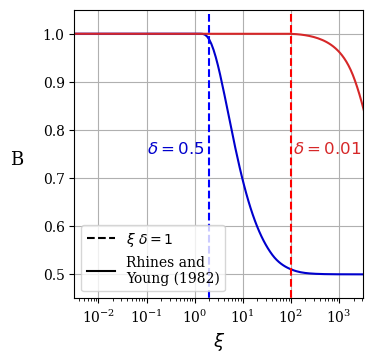

In [4]:
# recreate lines from text

plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(1,1, figsize = (15/4*3, 5/4*3))

# data
ax.plot(xis, Bs_delta_large, color = "mediumblue")
ax.plot(xis, Bs_delta_small, color = "tab:red")
ax.plot(np.ones(10)*2, np.linspace(0, 1.5, 10), 'b--')
ax.plot(np.ones(10)*100, np.linspace(0, 1.5, 10), 'r--')

# labels
ax.plot(xis, np.array(Bs_delta_large) + 10, 'k--', label = r"$\xi$ $\delta = 1$")
ax.plot(xis, np.array(Bs_delta_small) + 10, 'k', label = "Rhines and \nYoung (1982)")
ax.set_xlabel(r"$\xi$", size = 13)
ax.set_ylabel("B", rotation = 0, size = 13)
ax.text(0.1, 0.75, r'$\delta = 0.5$', color = 'mediumblue', size = 12)
ax.text(1.1e2, 0.75, r'$\delta = 0.01$', color = 'tab:red', size = 12)

# layout
ax.set_xscale("log")
ax.grid(which = 'major', zorder = -10)
ax.set_xlim([10**-2.5, 10**3.5])
ax.set_ylim([0.45, 1.05])
ax.yaxis.set_label_coords(-0.2,0.45)
ax.legend(loc = "lower left")
ax.set_aspect(1e1)